# Analise_Copa_2022 - 
## Este notebook procura tirar algumas statisticas descritivas dos dados coletado na copa de 2022

### Site:       https://filipe-deabreu.com

### Autor:      Filipe de Abreu

### Manutenção:  Filipe de Abreu

<hr>

# Testado em
### OS: Windows 11                                      
### Versão do python: 3.12.7    

In [220]:
#importações 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googletrans import Translator

In [168]:
df = pd.read_csv('dataset/(4.2) Jogos Copa 22.csv')
df.head(15)

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,0.33,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,0.54,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',..."
2,3,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,...,0.39,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2..."
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,...,0.25,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ..."
4,5,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,...,0.55,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
5,6,Quarter-finals,10/12/2022,False,False,False,Morocco,Portugal,1,0,...,0.64,641152,Al Thumama Stadium,"[{'event_team': 'home', 'event_time': "" 42' "",...","[{'player_name': ' Boufal ', 'player_number': ...","[{'player_name': ' Félix ', 'player_number': '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Amallah', '...","['17', '19', '7', '15', '4', '8', '25', '6', '...","['Félix', 'Ramos', 'Fernandes', 'Otávio', 'Nev...","['11', '26', '8', '25', '18', '10', '5', '4', ..."
6,7,Quarter-finals,09/12/2022,True,3,4,Netherlands,Argentina,2,2,...,0.73,690889,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 35' "",...","[{'player_name': ' Memphis ', 'player_number':...","[{'player_name': ' Álvarez ', 'player_number':...","['Memphis', 'Bergwijn', 'Gakpo', 'Blind', 'De ...","['10', '7', '8', '17', '21', '15', '22', '5', ...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '7', '8', '25', '19', ..."
7,8,Quarter-finals,09/12/2022,True,4,2,Croatia,Brazil,1,1,...,0.86,646999,Education City Stadium,"[{'event_team': 'away', 'event_time': "" 25' "",...","[{'player_name': ' Perišić ', 'player_number':...","[{'player_name': ' Richarlison ', 'player_numb...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ...","['Richarlison', 'Vinícius Júnior', 'Neymar', '...","['9', '20', '10', 

In [169]:
#Verificando as variaveis que terminando com "score"
df.columns[df.columns.str.endswith('score')] 

Index(['pens_home_score', 'pens_away_score', 'team_home_score',
       'team_away_score'],
      dtype='object')

In [170]:
#Extraindo todos os times

todos_os_paises = pd.concat(
                        [pd.Series(df['team_name_home'].unique()),
                        pd.Series(df['team_name_away'].unique())
                        ]
                    ).unique()
print(f'''
Quantidade de times {len(todo_os_paises)}
{todos_os_paises}
'''
)


Quantidade de times 32
['Argentina' 'Croatia' 'France' 'England' 'Morocco' 'Netherlands'
 'Portugal' 'Brazil' 'Japan' 'Cameroon' 'Serbia' 'South Korea' 'Ghana'
 'Costa Rica' 'Canada' 'Poland' 'Saudi Arabia' 'Tunisia' 'Australia'
 'Wales' 'Iran' 'Ecuador' 'Spain' 'Belgium' 'Qatar' 'Uruguay'
 'Switzerland' 'Germany' 'Mexico' 'Denmark' 'USA' 'Senegal']



In [171]:
#Traduzindo os nosmes de paises

translator = Translator()
odos_os_paises_pt = [] 

for i in todos_os_paises:
    #Se fez necessário utilizar um bloco TRY pois percebi que o tradutor retorna uma EXCEPTION toda vez que o texto nao precisa ser traduzido
    #Por exemplo, o primeiro item da lista é 'Argengina', que traduzido continuaria 'Argentina'
    #Nesses caso o tradutor retornaria um erro
    try:
        translated = translator.translate(i, dest='pt').text
        todos_os_paises_pt.append(translated)
    except Exception as e:
        print(f"Could not translate '{i}': {e}")
        todos_os_paises_pt.append(i)

todos_os_paises_pt

Could not translate 'Argentina': 'NoneType' object is not iterable
Could not translate 'Serbia': 'NoneType' object is not iterable


['Argentina',
 'Croácia',
 'França',
 'Inglaterra',
 'Marrocos',
 'Holanda',
 'Portugal',
 'Brasil',
 'Japão',
 'Camarões',
 'Serbia',
 'Coréia do Sul',
 'Gana',
 'Costa Rica',
 'Canadá',
 'Polônia',
 'Arábia Saudita',
 'Tunísia',
 'Austrália',
 'Gales',
 'Irã',
 'Equador',
 'Espanha',
 'Bélgica',
 'Catar',
 'Uruguai',
 'Suíça',
 'Alemanha',
 'México',
 'Dinamarca',
 'EUA',
 'Senegal',
 'Argentina',
 'Croácia',
 'França',
 'Inglaterra',
 'Marrocos',
 'Holanda',
 'Portugal',
 'Brasil',
 'Japão',
 'Camarões',
 'Serbia',
 'Coréia do Sul',
 'Gana',
 'Costa Rica',
 'Canadá',
 'Polônia',
 'Arábia Saudita',
 'Tunísia',
 'Austrália',
 'Gales',
 'Irã',
 'Equador',
 'Espanha',
 'Bélgica',
 'Catar',
 'Uruguai',
 'Suíça',
 'Alemanha',
 'México',
 'Dinamarca',
 'EUA',
 'Senegal',
 'Argentina',
 'Croácia',
 'França',
 'Inglaterra',
 'Marrocos',
 'Holanda',
 'Portugal',
 'Brasil',
 'Japão',
 'Camarões',
 'Serbia',
 'Coréia do Sul',
 'Gana',
 'Costa Rica',
 'Canadá',
 'Polônia',
 'Arábia Saudita',
 'T

In [172]:
#Criando um dicionario onde a chave é o nome do paise em ingles e o valor é  o nome do país em portugues
dicionario_de_paises = {}

for i,j in zip(todos_os_paises,range(len(todos_os_paises))):
    dicionario_de_paises[i] = todos_os_paises_pt[j]

dicionario_de_paises

{'Argentina': 'Argentina',
 'Croatia': 'Croácia',
 'France': 'França',
 'England': 'Inglaterra',
 'Morocco': 'Marrocos',
 'Netherlands': 'Holanda',
 'Portugal': 'Portugal',
 'Brazil': 'Brasil',
 'Japan': 'Japão',
 'Cameroon': 'Camarões',
 'Serbia': 'Serbia',
 'South Korea': 'Coréia do Sul',
 'Ghana': 'Gana',
 'Costa Rica': 'Costa Rica',
 'Canada': 'Canadá',
 'Poland': 'Polônia',
 'Saudi Arabia': 'Arábia Saudita',
 'Tunisia': 'Tunísia',
 'Australia': 'Austrália',
 'Wales': 'Gales',
 'Iran': 'Irã',
 'Ecuador': 'Equador',
 'Spain': 'Espanha',
 'Belgium': 'Bélgica',
 'Qatar': 'Catar',
 'Uruguay': 'Uruguai',
 'Switzerland': 'Suíça',
 'Germany': 'Alemanha',
 'Mexico': 'México',
 'Denmark': 'Dinamarca',
 'USA': 'EUA',
 'Senegal': 'Senegal'}

In [173]:
#Utilizei a função ".map" e o dicionario previamente criado para traduzir todos os textos do dataframe nas variaveis'team_name_home' e 'team_home_score'

df['team_name_home'] = df['team_name_home'].map(dicionario_de_paises)
df['team_name_away'] = df['team_name_away'].map(dicionario_de_paises)

df

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Final,18/12/2022,True,4,2,Argentina,França,3,3,...,0.33,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
1,2,Match for third place,17/12/2022,False,False,False,Croácia,Marrocos,2,1,...,0.54,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',..."
2,3,Semi-finals,14/12/2022,False,False,False,França,Marrocos,2,0,...,0.39,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2..."
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croácia,3,0,...,0.25,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ..."
4,5,Quarter-finals,10/12/2022,False,False,False,Inglaterra,França,1,2,...,0.55,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Arábia Saudita,1,2,...,0.04,657383,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 10' "",...","[{'player_name': ' Martínez ', 'player_number'...","[{'player_name': ' Al-Shehri ', 'player_number...","['Martínez', 'Messi', 'Gómez', 'Paredes', 'De ...","['22', '10', '17', '5', '7', '11', '3', '19', ...","['Al-Shehri', 'Al-Dawsari', 'Kanno', 'Al-Faraj...","['11', '10', '23', '7', '9', '8', '13', '5', '..."
60,61,Group stage: Matchday 1,21/11/2022,False,False,False,EUA,Gales,1,1,...,0.40,361145,Ahmad bin Ali Stadium,"[{'event_team': 'home', 'event_time': "" 11' "",...","[{'player_name': ' Pulisic ', 'player_number':...","[{'player_name': ' James ', 'player_number': '...","['Pulisic', 'Sargent', 'Weah', 'Musah', 'Adams...","['10', '24', '21', '6', '4', '8', '5', '13', '...","['James', 'Bale', 'Williams', 'Wilson', 'Ampad...","['20', '11', '3', '8', '15', '10', '14', '4', ..."
61,62,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Holanda,0,2,...,0.71,457977,Al Thumama Stadium,"[{'event_team': 'away', 'event_time': "" 56' "",...","[{'player_name': ' Dia ', 'player_number': ' 9...","[{'player_name': ' Bergwijn ', 'player_number'...","['Dia', 'Sarr', 'Gueye', 'Diatta',

In [192]:
#Considera-se 'goleada', quando a diferença de gols do time vencedor é maior do que 3
#Bom base nisso, irei criar uma variable categorica com base nas variaveis 'team_home_score' e 'team_away_score'
# A ideia é verificar em cada observação se a diferenção entre essas duas variáveis quantitativas é maior do que 3 e classificar

df['Goleada?'] = np.where(
    (abs(df['team_home_score'] - df['team_away_score']))  >= 3, 'Goleada', 'Nao foi goleada')

df

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away,Goleada?
0,1,Final,18/12/2022,True,4,2,Argentina,França,3,3,...,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ...",Nao foi goleada
1,2,Match for third place,17/12/2022,False,False,False,Croácia,Marrocos,2,1,...,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',...",Nao foi goleada
2,3,Semi-finals,14/12/2022,False,False,False,França,Marrocos,2,0,...,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2...",Nao foi goleada
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croácia,3,0,...,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ...",Goleada
4,5,Quarter-finals,10/12/2022,False,False,False,Inglaterra,França,1,2,...,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ...",Nao foi goleada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Arábia Saudita,1,2,...,657383,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 10' "",...","[{'player_name': ' Martínez ', 'player_number'...","[{'player_name': ' Al-Shehri ', 'player_number...","['Martínez', 'Messi', 'Gómez', 'Paredes', 'De ...","['22', '10', '17', '5', '7', '11', '3', '19', ...","['Al-Shehri', 'Al-Dawsari', 'Kanno', 'Al-Faraj...","['11', '10', '23', '7', '9', '8', '13', '5', '...",Nao foi goleada
60,61,Group stage: Matchday 1,21/11/2022,False,False,False,EUA,Gales,1,1,...,361145,Ahmad bin Ali Stadium,"[{'event_team': 'home', 'event_time': "" 11' "",...","[{'player_name': ' Pulisic ', 'player_number':...","[{'player_name': ' James ', 'player_number': '...","['Pulisic', 'Sargent', 'Weah', 'Musah', 'Adams...","['10', '24', '21', '6', '4', '8', '5', '13', '...","['James', 'Bale', 'Williams', 'Wilson', 'Ampad...","['20', '11', '3', '8', '15', '10', '14', '4', ...",Nao foi goleada
61,62,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Holanda,0,2,...,457977,Al Thumama Stadium,"[{'event_team': 'away', 'event_time': "" 56' "",...","[{'player_name': ' Dia ', 'player_number': ' 9...","[{'player_name': ' Bergwijn ', 'player

In [198]:
#Realizando uma contagem relativa dos jogos on houve goleada

calculo_relativo = len(df[df['Goleada?'] == 'Goleada']) / len(df[df['Goleada?'] == 'Nao foi goleada']) * 100

print(f'{calculo_relativo:.2f}%')

16.36%


Assim, conforme calculo acima, em 16% dos jogos houve goleada, categoria essa que foi definida com base em que onde a diferença de gols entre os time é maior do que 3

In [218]:
#Agora unindo todos os score em uma unica variavel
df_scores = pd.DataFrame(pd.concat([df['team_home_score'],df['team_away_score']]), columns=['Scores'])

#Verificando os quartis
df_scores['quartis'] = pd.qcut(df_scores['Scores'], q=3, labels=['1° Quartil','2° quartil','3° quartil'])

df_scores

,Scores,quartis
0,3,3° quartil
1,2,2° quartil
2,2,2° quartil
3,3,3° quartil
4,1,1° Quartil
...,...,...
59,2,2° quartil
60,1,1° Quartil
61,2,2° quartil
62,2,2° quartil


{'whiskers': [<matplotlib.lines.Line2D at 0x24ac5ec8d70>,
 'caps': [<matplotlib.lines.Line2D at 0x24ac5eb8050>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ac5ab7680>],
 'medians': [<matplotlib.lines.Line2D at 0x24ac5eca2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ac5eca600>],
 'means': []}

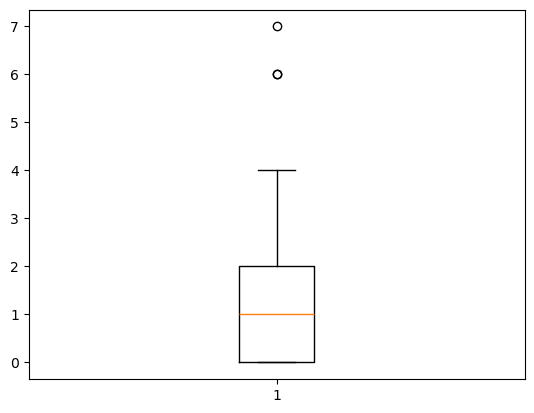

In [221]:
#Visualizando os quartis

plt.boxplot(df_scores['Scores'])